# ADS 508 Final Project

Christopher Garcia, Claire Phibbs, and Christine Vu

Shiley-Marcos School of Engineering, University of San Diego

ADS 508: Data Science with Cloud Computing

Professor Jules Malin

April 17, 2023

***

## Diabetes Health Indicators Dataset:
https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

***

## Schema
**diabetes_012_health_indicators_BRFSS2015:**
- `Diabetes_012`: 0 = no diabetes, 1 = prediabetes, and 2 = diabetes.
- `HighBP`: 0 = no high BP and 1 = high BP.
- `HighChol`: 0 = no high cholesterol and 1 = high cholesterol.
- `CholCheck`: 0 = no cholesterol check in 5 years and 1 = yes cholesterol check in 5 years.
- `BMI`: Body Mass Index.
- `Smoker`: Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no and 1 = yes.
- `Stroke`: (Ever told) you had a stroke. 0 = no and 1 = yes.
- `HeartDiseaseorAttack`: Coronary heart disease (CHD) or myocardial infarction (MI). 0 = no and 1 = yes.
- `PhysActivity`: Physical activity in past 30 days, not including job. 0 = no and 1 = yes.
- `Fruits`: Consume fruits 1 or more times per day. 0 = no and 1 = yes.
- `Veggies`: Consume vegetables 1 or more times per day. 0 = no and 1 = yes.
- `HvyAlcoholConsump`: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week). 0 = no and 1 = yes.
- `AnyHealthcare`: Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no and 1 = yes.
- `NoDocbcCost`: Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no and 1 = yes
- `GenHlth`: How would you say that in general your health is? Scale 1-5 (1 = excellent, 2 = very good, 3 = good, 4 = fair, 5 = poor).
- `MentHlth`: For how many days during the past 30 days was your mental health, which includes stress, depression, and problems with emotions, not good? Scale 1-30 days.
- `PhysHlth`: For how many days during the past 30 days was your physical health, which includes physical illness and injury, not good? Scale 1-30 days.
- `DiffWalk`: Do you have serious difficulty walking or climbing stairs? 0 = no and 1 = yes.
- `Sex`: 0 = female and 1 = male.
- `Age`: 13-level age category. 1 = ages 18-24, 9 = ages 60-64, and 13 = ages 80 or older.
- `Education`: Education level. Scale 1-6 (1 = Never attended school or only kindergarten, 2 = Grades 1 through 8 (Elementary), 3 = Grades 9 through 11 (Some high school), 4 = Grade 12 or GED (High school graduate), 5 = College 1 year to 3 years (Some college or technical school), 6 = College 4 years or more (College graduate)).
- `Income`: Income scale. Scale 1-8 (1 = less than $10,000, 5 = less than $35,000, 8 = $75,000 or more).

**diabetes_binary_5050split_health_indicators_BRFSS2015 & diabetes_binary_health_indicators_BRFSS2015:**
- `Diabetes_012`: 0 = no diabetes, 1 = prediabetes or diabetes.
- `HighBP`: 0 = no high BP and 1 = high BP.
- `HighChol`: 0 = no high cholesterol and 1 = high cholesterol.
- `CholCheck`: 0 = no cholesterol check in 5 years and 1 = yes cholesterol check in 5 years.
- `BMI`: Body Mass Index.
- `Smoker`: Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no and 1 = yes.
- `Stroke`: (Ever told) you had a stroke. 0 = no and 1 = yes.
- `HeartDiseaseorAttack`: Coronary heart disease (CHD) or myocardial infarction (MI). 0 = no and 1 = yes.
- `PhysActivity`: Physical activity in past 30 days, not including job. 0 = no and 1 = yes.
- `Fruits`: Consume fruits 1 or more times per day. 0 = no and 1 = yes.
- `Veggies`: Consume vegetables 1 or more times per day. 0 = no and 1 = yes.
- `HvyAlcoholConsump`: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week). 0 = no and 1 = yes.
- `AnyHealthcare`: Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no and 1 = yes.
- `NoDocbcCost`: Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no and 1 = yes
- `GenHlth`: How would you say that in general your health is? Scale 1-5 (1 = excellent, 2 = very good, 3 = good, 4 = fair, 5 = poor).
- `MentHlth`: For how many days during the past 30 days was your mental health, which includes stress, depression, and problems with emotions, not good? Scale 1-30 days.
- `PhysHlth`: For how many days during the past 30 days was your physical health, which includes physical illness and injury, not good? Scale 1-30 days.
- `DiffWalk`: Do you have serious difficulty walking or climbing stairs? 0 = no and 1 = yes.
- `Sex`: 0 = female and 1 = male.
- `Age`: 13-level age category. 1 = ages 18-24, 9 = ages 60-64, and 13 = ages 80 or older.
- `Education`: Education level. Scale 1-6 (1 = Never attended school or only kindergarten, 2 = Grades 1 through 8 (Elementary), 3 = Grades 9 through 11 (Some high school), 4 = Grade 12 or GED (High school graduate), 5 = College 1 year to 3 years (Some college or technical school), and 6 = College 4 years or more (College graduate)).
- `Income`: Income scale. Scale 1-8 (1 = less than $10,000, 5 = less than $35,000, and 8 = $75,000 or more).
***

## Loading in Necessary Libraries 

In [5]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import boto3
import sagemaker
from pyathena import connect
from scipy.stats import boxcox 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
import io

## Ingesting the Data into AWS S3 and SageMaker

In [6]:
sess = sagemaker.Session()
bucket = sess.default_bucket()
role = sagemaker.get_execution_role()
region = boto3.Session().region_name
account_id = boto3.client("sts").get_caller_identity().get("Account")

sm = boto3.Session().client(service_name = "sagemaker", region_name = region)

In [7]:
ingest_create_athena_db_passed = False

In [8]:
# viewing the s3 bucket content to confirm the 3 csv files are there
!aws s3 ls s3://diabetes-ads508/folder-1/csv/
!aws s3 ls s3://diabetes-ads508/folder-2/csv/
!aws s3 ls s3://diabetes-ads508/folder-3/csv/

2023-03-20 21:38:19          0 
2023-03-20 21:39:29   11829910 diabetes_012_health_indicators_BRFSS2015.csv
2023-03-20 21:38:28          0 
2023-03-20 21:40:39    3307813 diabetes_binary_5050split_health_indicators_BRFSS2015.csv
2023-03-20 21:38:41          0 
2023-03-20 21:40:55   11829913 diabetes_binary_health_indicators_BRFSS2015.csv


In [9]:
# set source location of public s3 bucket
s3_public_path = "s3://diabetes-ads508/folder-1/csv"
%store s3_public_path

s3_public_path_2 = "s3://diabetes-ads508/folder-2/csv"
%store s3_public_path_2

Stored 's3_public_path' (str)
Stored 's3_public_path_2' (str)


In [10]:
# set distination location of private s3 bucket
s3_private_path = "s3://{}/diabetes-ads508/folder-1/csv".format(bucket)
print(s3_private_path)
%store s3_private_path

s3_private_path_2 = "s3://{}/diabetes-ads508/folder-2/csv".format(bucket)
print(s3_private_path_2)
%store s3_private_path_2

s3://sagemaker-us-east-1-902123297530/diabetes-ads508/folder-1/csv
Stored 's3_private_path' (str)
s3://sagemaker-us-east-1-902123297530/diabetes-ads508/folder-2/csv
Stored 's3_private_path_2' (str)


In [11]:
!aws s3 cp --recursive $s3_public_path/ $s3_private_path/ --exclude "*" --include "diabetes_012_health_indicators_BRFSS2015.csv"
!aws s3 cp --recursive $s3_public_path_2/ $s3_private_path_2/ --exclude "*" --include "diabetes_binary_5050split_health_indicators_BRFSS2015.csv"

copy: s3://diabetes-ads508/folder-1/csv/diabetes_012_health_indicators_BRFSS2015.csv to s3://sagemaker-us-east-1-902123297530/diabetes-ads508/folder-1/csv/diabetes_012_health_indicators_BRFSS2015.csv
copy: s3://diabetes-ads508/folder-2/csv/diabetes_binary_5050split_health_indicators_BRFSS2015.csv to s3://sagemaker-us-east-1-902123297530/diabetes-ads508/folder-2/csv/diabetes_binary_5050split_health_indicators_BRFSS2015.csv


In [12]:
# list files in the private s3 bucket
print(s3_private_path)
print(s3_private_path_2)

s3://sagemaker-us-east-1-902123297530/diabetes-ads508/folder-1/csv
s3://sagemaker-us-east-1-902123297530/diabetes-ads508/folder-2/csv


In [13]:
# checking files copied to private bucket successfully
!aws s3 ls $s3_private_path/
!aws s3 ls $s3_private_path_2/

2023-03-27 19:48:27   11829910 diabetes_012_health_indicators_BRFSS2015.csv
2023-03-27 19:48:28    3307813 diabetes_binary_5050split_health_indicators_BRFSS2015.csv


### Creating Athena Database

In [14]:
# create database
database_name = "diabetes"

In [15]:
 # Set S3 staging directory -- this is a temporary directory used for Athena queries
s3_staging_dir = "s3://{0}/athena/staging".format(bucket)

In [16]:
conn = connect(region_name=region, s3_staging_dir=s3_staging_dir)

In [17]:
statement = "CREATE DATABASE IF NOT EXISTS {}".format(database_name) 
print(statement)
pd.read_sql(statement, conn)

CREATE DATABASE IF NOT EXISTS diabetes


""


In [18]:
# verifying database diabetes has been created
statement = "SHOW DATABASES"

df_show = pd.read_sql(statement, conn)
df_show.head()

,database_name
0,default
1,diabetes


### Registering S3 Bucket with Athena 

In [19]:
# set athena parameters
database_name = "diabetes"
table_name = "diabetes_indicators"
table_name_2 = "diabetes_binary_5050split"

In [20]:
pd.read_sql(f'DROP TABLE IF EXISTS diabetes.diabetes_indicators', conn)
pd.read_sql(f'DROP TABLE IF EXISTS diabetes.diabetes_binary_5050split', conn)

""


In [21]:
diabetes_indicators_table = f"""CREATE EXTERNAL TABLE IF NOT EXISTS {database_name}.{table_name}(
                Diabetes_012 int,
                HighBP int,
                HighChol int,
                CholCheck int,
                BMI int,
                Smoker int,
                Stroke int, 
                HeartDisease int,
                PhysActivity int,
                Fruits int,
                Veggies int,
                HvyAlcoholConsump int,
                AnyHealthCare int,
                NoDocbcCost int,
                GenHlth int,
                MentHlth int,
                PhysHlth int,
                DiffWalk int,
                Sex int,
                Age int,
                Education int,
                Income int
) ROW FORMAT DELIMITED FIELDS TERMINATED BY ',' 
LOCATION 's3://diabetes-ads508/folder-1/csv'
TBLPROPERTIES ('classification' = 'csv', 'skip.header.line.count'='1')"""

pd.read_sql(diabetes_indicators_table, conn)

""


In [22]:
diabetes_binary_5050split_table = f"""CREATE EXTERNAL TABLE IF NOT EXISTS {database_name}.{table_name_2}(
                Diabetes_binary int,
                HighBP int,
                HighChol int,
                CholCheck int,
                BMI int,
                Smoker int,
                Stroke int, 
                HeartDisease int,
                PhysActivity int,
                Fruits int,
                Veggies int,
                HvyAlcoholConsump int,
                AnyHealthCare int,
                NoDocbcCost int,
                GenHlth int,
                MentHlth int,
                PhysHlth int,
                DiffWalk int,
                Sex int,
                Age int,
                Education int,
                Income int
) ROW FORMAT DELIMITED FIELDS TERMINATED BY ',' 
LOCATION 's3://diabetes-ads508/folder-2/csv'
TBLPROPERTIES ('classification' = 'csv', 'skip.header.line.count'='1')"""

pd.read_sql(diabetes_binary_5050split_table, conn)

""


In [23]:
statement = "SHOW TABLES in {}".format(database_name)

df_show = pd.read_sql(statement, conn)
df_show.head()

,tab_name
0,diabetes_binary_5050split
1,diabetes_indicators


In [24]:
# confirming creation of table
statement = """SELECT * FROM diabetes.diabetes_indicators LIMIT 5"""
pd.read_sql(statement, conn)

,diabetes_012,highbp,highchol,cholcheck,bmi,smoker,stroke,heartdisease,physactivity,fruits,...,anyhealthcare,nodocbccost,genhlth,menthlth,physhlth,diffwalk,sex,age,education,income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [25]:
# confirming creation of table
statement = """SELECT * FROM diabetes.diabetes_binary_5050split LIMIT 5"""
pd.read_sql(statement, conn)

,diabetes_binary,highbp,highchol,cholcheck,bmi,smoker,stroke,heartdisease,physactivity,fruits,...,anyhealthcare,nodocbccost,genhlth,menthlth,physhlth,diffwalk,sex,age,education,income
0,0,1,0,1,26,0,0,0,1,0,...,1,0,3,5,30,0,1,4,6,8
1,0,1,1,1,26,1,1,0,0,1,...,1,0,3,0,0,0,1,12,6,8
2,0,0,0,1,26,0,0,0,1,1,...,1,0,1,0,10,0,1,13,6,8
3,0,1,1,1,28,1,0,0,1,1,...,1,0,3,0,3,0,1,11,6,8
4,0,0,0,1,29,1,0,0,1,1,...,1,0,2,0,0,0,0,8,5,8


### Creating Data Frames of the Ingested Data

In [26]:
# Creating pandas df from query
statement = """SELECT * FROM diabetes.diabetes_indicators"""
diabetes_indicators_df = pd.read_sql(statement, conn)
diabetes_indicators_df.head()

,diabetes_012,highbp,highchol,cholcheck,bmi,smoker,stroke,heartdisease,physactivity,fruits,...,anyhealthcare,nodocbccost,genhlth,menthlth,physhlth,diffwalk,sex,age,education,income
0,0,0,0,1,21,1,0,0,1,1,...,1,1,3,2,0,0,0,7,5,4
1,0,0,0,1,24,0,0,0,1,1,...,1,0,1,0,0,0,0,4,6,8
2,0,1,1,1,27,0,0,0,1,1,...,1,0,2,2,1,0,0,10,5,8
3,0,1,1,1,23,0,0,0,0,0,...,1,0,2,0,0,0,0,10,5,7
4,0,0,1,1,41,0,0,0,1,1,...,1,0,3,0,0,0,1,11,6,7


In [27]:
# Creating pandas df from query
statement = """SELECT * FROM diabetes.diabetes_binary_5050split"""
diabetes_binary_5050split_df = pd.read_sql(statement, conn)
diabetes_binary_5050split_df.head()

,diabetes_binary,highbp,highchol,cholcheck,bmi,smoker,stroke,heartdisease,physactivity,fruits,...,anyhealthcare,nodocbccost,genhlth,menthlth,physhlth,diffwalk,sex,age,education,income
0,0,1,0,1,26,0,0,0,1,0,...,1,0,3,5,30,0,1,4,6,8
1,0,1,1,1,26,1,1,0,0,1,...,1,0,3,0,0,0,1,12,6,8
2,0,0,0,1,26,0,0,0,1,1,...,1,0,1,0,10,0,1,13,6,8
3,0,1,1,1,28,1,0,0,1,1,...,1,0,3,0,3,0,1,11,6,8
4,0,0,0,1,29,1,0,0,1,1,...,1,0,2,0,0,0,0,8,5,8


## Exploratory Data Analysis (EDA)

In [28]:
# Shape of dataframes
print("Diabetes Shape:", diabetes_indicators_df.shape)
print("Diabetes 50/50 Split Shape:", diabetes_binary_5050split_df.shape)

Diabetes Shape: (253680, 22)
Diabetes 50/50 Split Shape: (70692, 22)


In [29]:
# Find missing values
print("Diabetes Missing Values:", diabetes_indicators_df.isna().sum())
print("Diabetes Missing Values:", diabetes_binary_5050split_df.isna().sum())

Diabetes Missing Values: diabetes_012         0
highbp               0
highchol             0
cholcheck            0
bmi                  0
smoker               0
stroke               0
heartdisease         0
physactivity         0
fruits               0
veggies              0
hvyalcoholconsump    0
anyhealthcare        0
nodocbccost          0
genhlth              0
menthlth             0
physhlth             0
diffwalk             0
sex                  0
age                  0
education            0
income               0
dtype: int64
Diabetes Missing Values: diabetes_binary      0
highbp               0
highchol             0
cholcheck            0
bmi                  0
smoker               0
stroke               0
heartdisease         0
physactivity         0
fruits               0
veggies              0
hvyalcoholconsump    0
anyhealthcare        0
nodocbccost          0
genhlth              0
menthlth             0
physhlth             0
diffwalk             0
sex              

In [30]:
# Data types of all columns
print("Diabetes Data Types:\n", diabetes_indicators_df.dtypes)
print("\nDiabetes 50/50 Split Data Types:\n", diabetes_binary_5050split_df.dtypes)

Diabetes Data Types:
 diabetes_012         int64
highbp               int64
highchol             int64
cholcheck            int64
bmi                  int64
smoker               int64
stroke               int64
heartdisease         int64
physactivity         int64
fruits               int64
veggies              int64
hvyalcoholconsump    int64
anyhealthcare        int64
nodocbccost          int64
genhlth              int64
menthlth             int64
physhlth             int64
diffwalk             int64
sex                  int64
age                  int64
education            int64
income               int64
dtype: object

Diabetes 50/50 Split Data Types:
 diabetes_binary      int64
highbp               int64
highchol             int64
cholcheck            int64
bmi                  int64
smoker               int64
stroke               int64
heartdisease         int64
physactivity         int64
fruits               int64
veggies              int64
hvyalcoholconsump    int64
anyhealthca

### Bar plot
Distribution of diabetes

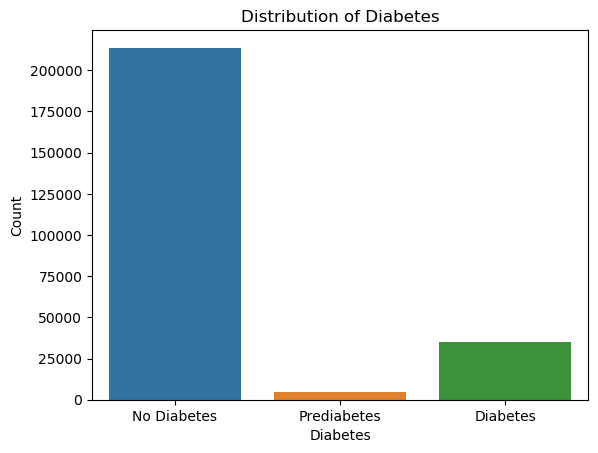

In [31]:
# Get the count of diabetes values
diabetes_count = diabetes_indicators_df['diabetes_012'].value_counts()

# Create a bar plot
fig, ax = plt.subplots()
sns.barplot(x = diabetes_count.index, y = diabetes_count.values, ax = ax)
ax.set_xticklabels(['No Diabetes', 'Prediabetes', 'Diabetes'])
ax.set_xlabel('Diabetes')
ax.set_ylabel('Count')
ax.set_title('Distribution of Diabetes')
plt.show()

*We can see from the bar graph above that the diabetes_indicators_df has a 3 class target variable (diabetes_012) and it is quite imbalanced, with a majority of the responses being 0 (i.e., no diabetes).*

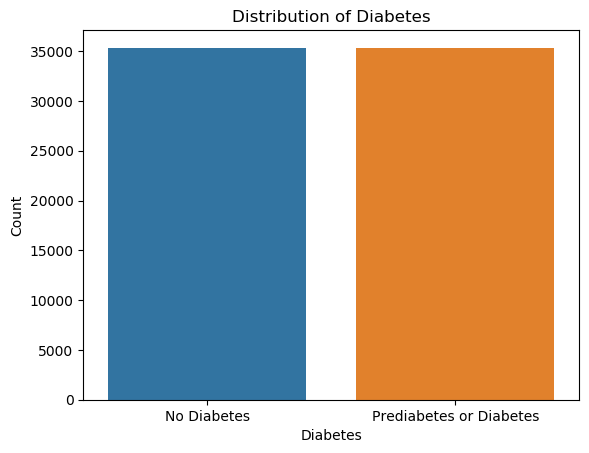

In [32]:
# Get the count of diabetes values
diabetes_count = diabetes_binary_5050split_df['diabetes_binary'].value_counts()

# Create a bar plot
fig, ax = plt.subplots()
sns.barplot(x = diabetes_count.index, y = diabetes_count.values, ax = ax)
ax.set_xticklabels(['No Diabetes', 'Prediabetes or Diabetes'])
ax.set_xlabel('Diabetes')
ax.set_ylabel('Count')
ax.set_title('Distribution of Diabetes')
plt.show()

*From the bar graph above we can see that the diabetes_binary_5050split_df has a two class target variable (diabetes_binary) and the target variable has been balanced. Given that the diabetes_binary_5050split_df has been balanced before partitoning the df, it can introduce data leakage. Moving forwards we will be working with the diabetes_indicators_df.*

In [33]:
# Class Proportions: Check for balanced target class (Diabetes_012 / Diabetes_binary)

# Diabetes: Determine if 'diabetes_012' column is balanced
# diabetes_012: 0 = no diabetes, 1 = prediabetes, 2 = diabetes
print("Diabetes:\n", diabetes_indicators_df['diabetes_012'].value_counts())
print(diabetes_indicators_df['diabetes_012'].value_counts() / diabetes_indicators_df.shape[0] * 100)

0    213703
2     35346
1      4631
Name: diabetes_012, dtype: int64

### Bar plot
Diabetes by predictor variables

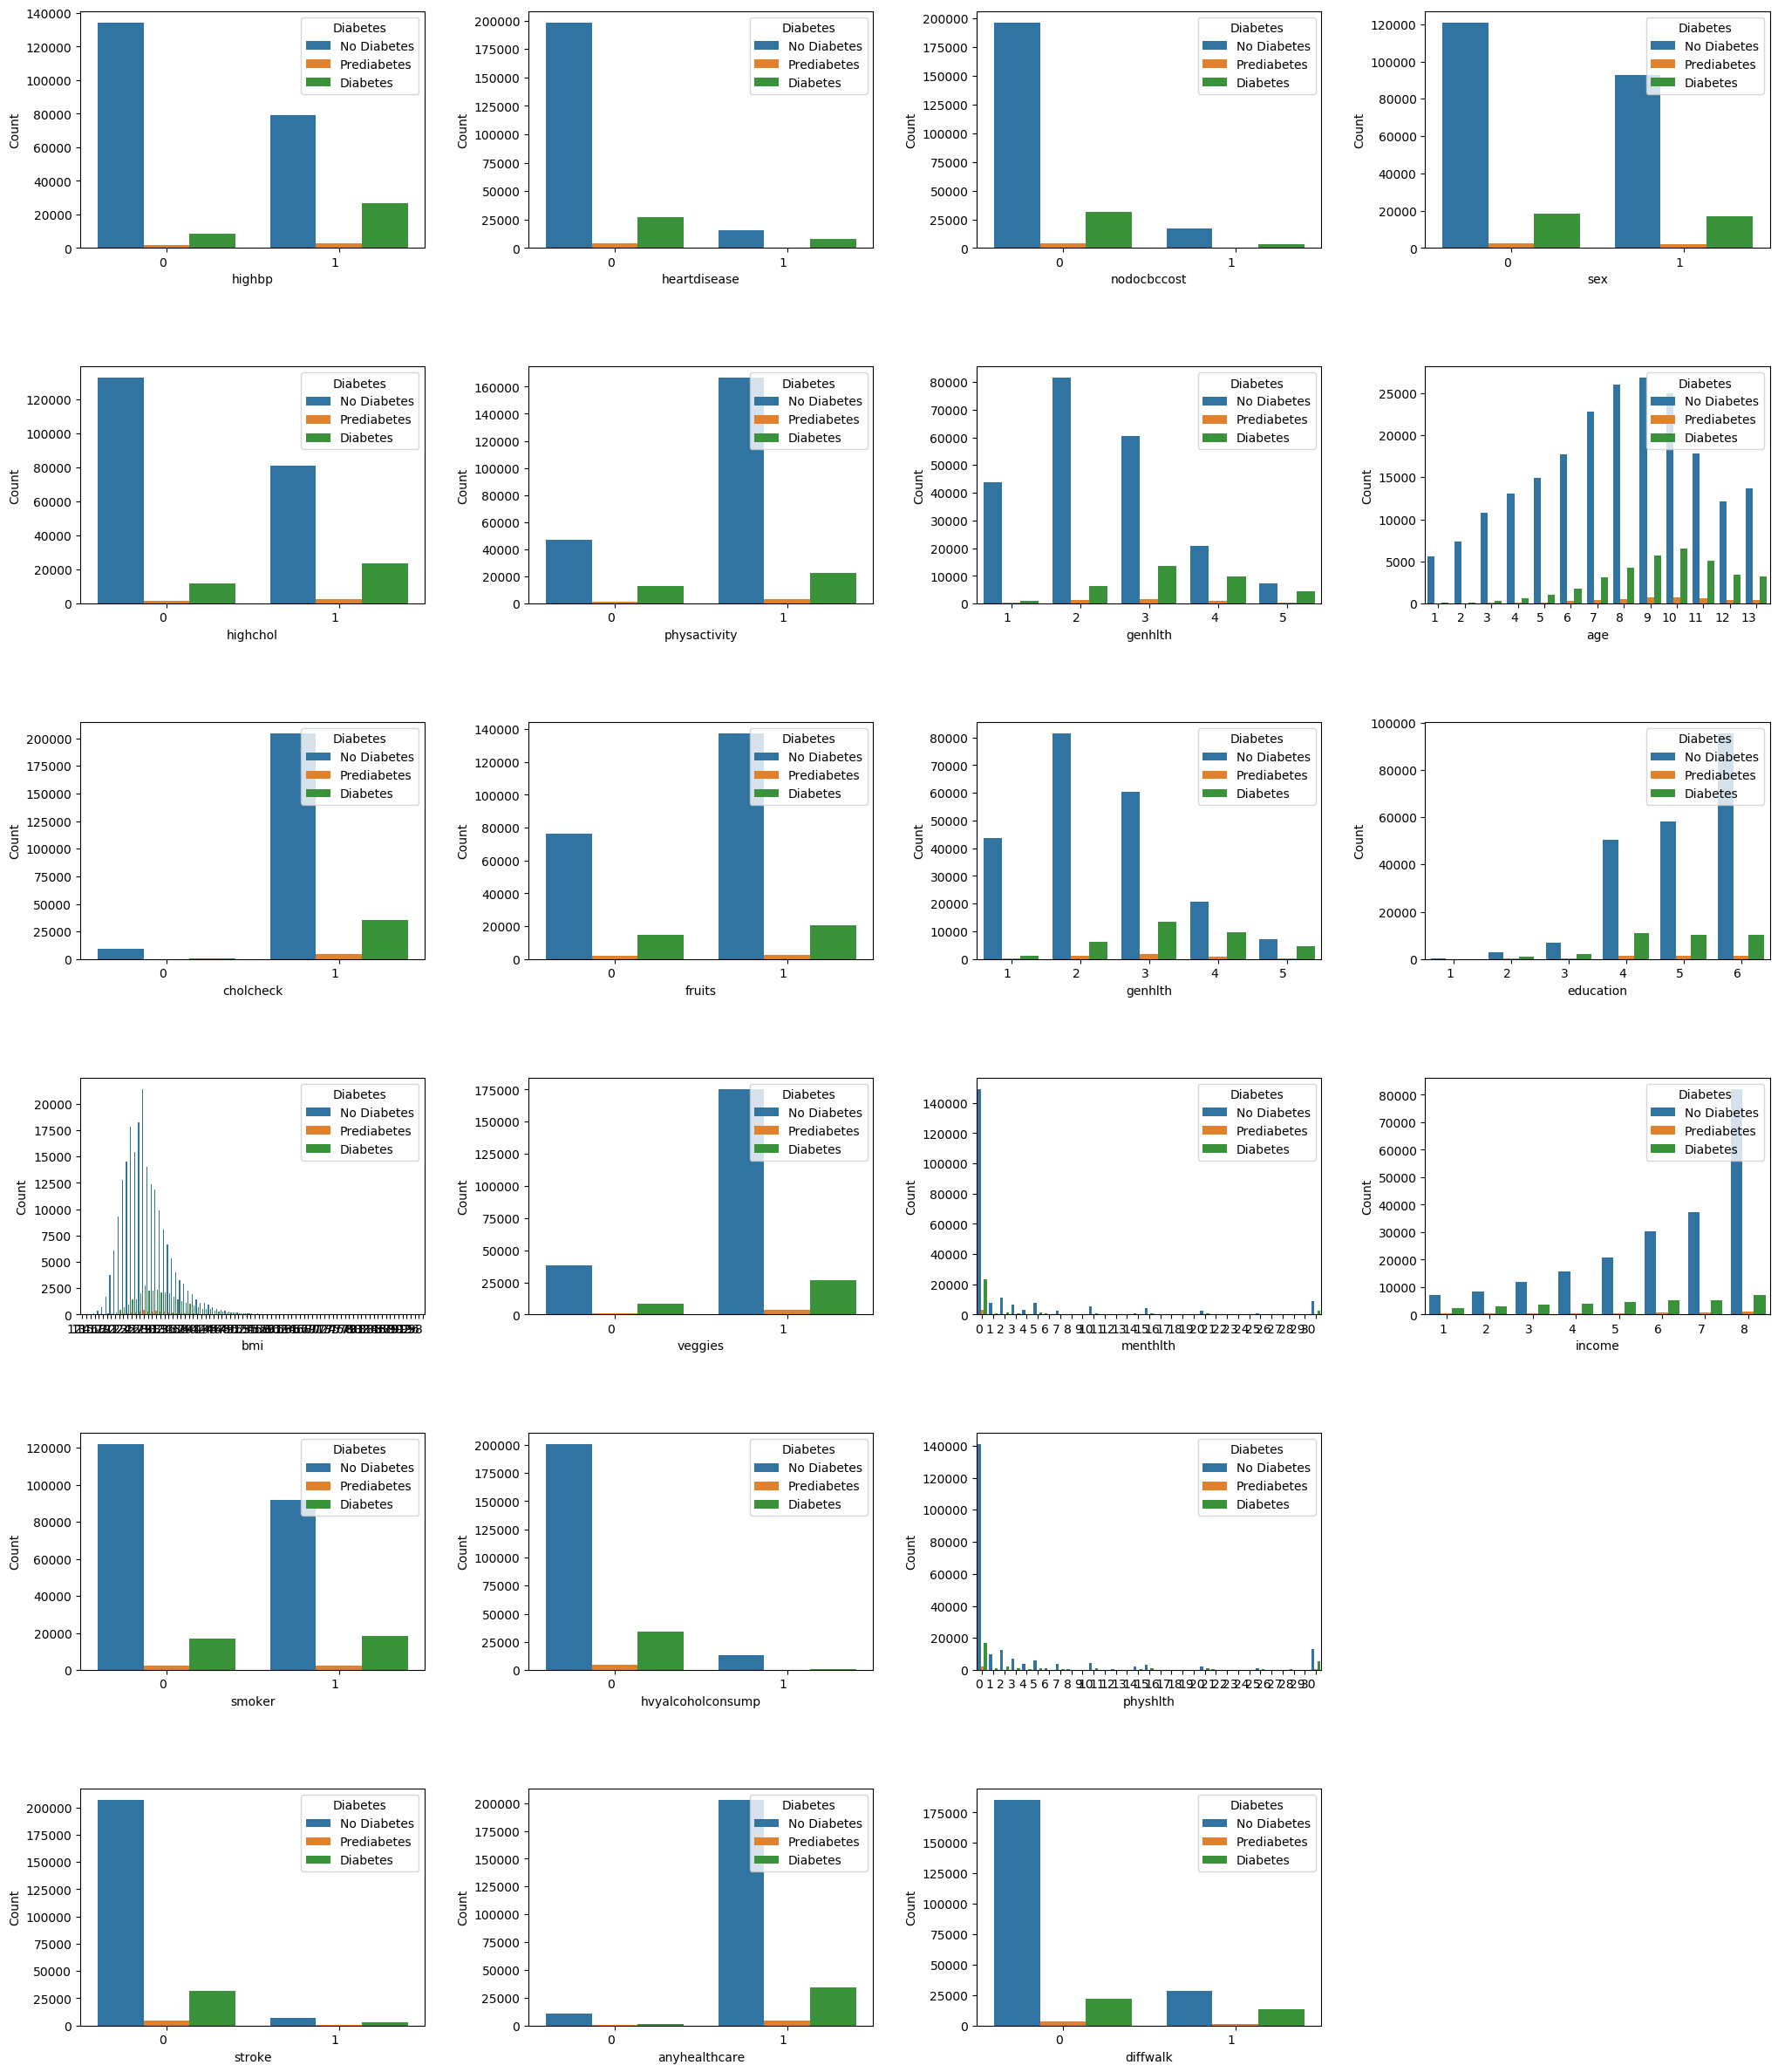

In [34]:
predictors = ['highbp', 'highchol', 'cholcheck', 'bmi', 'smoker', 'stroke', 'heartdisease', 'physactivity', 'fruits', 'veggies', 'hvyalcoholconsump',
              'anyhealthcare', 'nodocbccost', 'genhlth', 'genhlth', 'menthlth', 'physhlth', 'diffwalk', 'sex', 'age', 'education', 'income']

fig, axes = plt.subplots(6, 4, figsize = (25, 30))

# Create bar charts for each predictor variable
for i, pred in enumerate(predictors):
    # Calculate row and column indices
    row = i % 6
    col = i // 6

    # Create bar chart for each predictor variable
    fig = sns.countplot(x = pred, hue = 'diabetes_012', data = diabetes_indicators_df, ax = axes[row, col])
    fig.set_xticklabels(fig.get_xticklabels(), horizontalalignment = 'right')
    fig.set_xlabel(pred)
    fig.set_ylabel('Count')
    fig.legend(title = 'Diabetes', loc = 'upper right', labels = ['No Diabetes', 'Prediabetes', 'Diabetes'])

# Adjust the space between subplots
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)

# Hide unused subplots
for j in range(i + 1, 24):
    row = j % 6
    col = j // 6
    axes[row, col].axis('off')

# Show the plot

plt.savefig('diabetes_indicators.png')

plt.show()

### Box plot
View outliers of Diabetes 50/50 Split dataframe

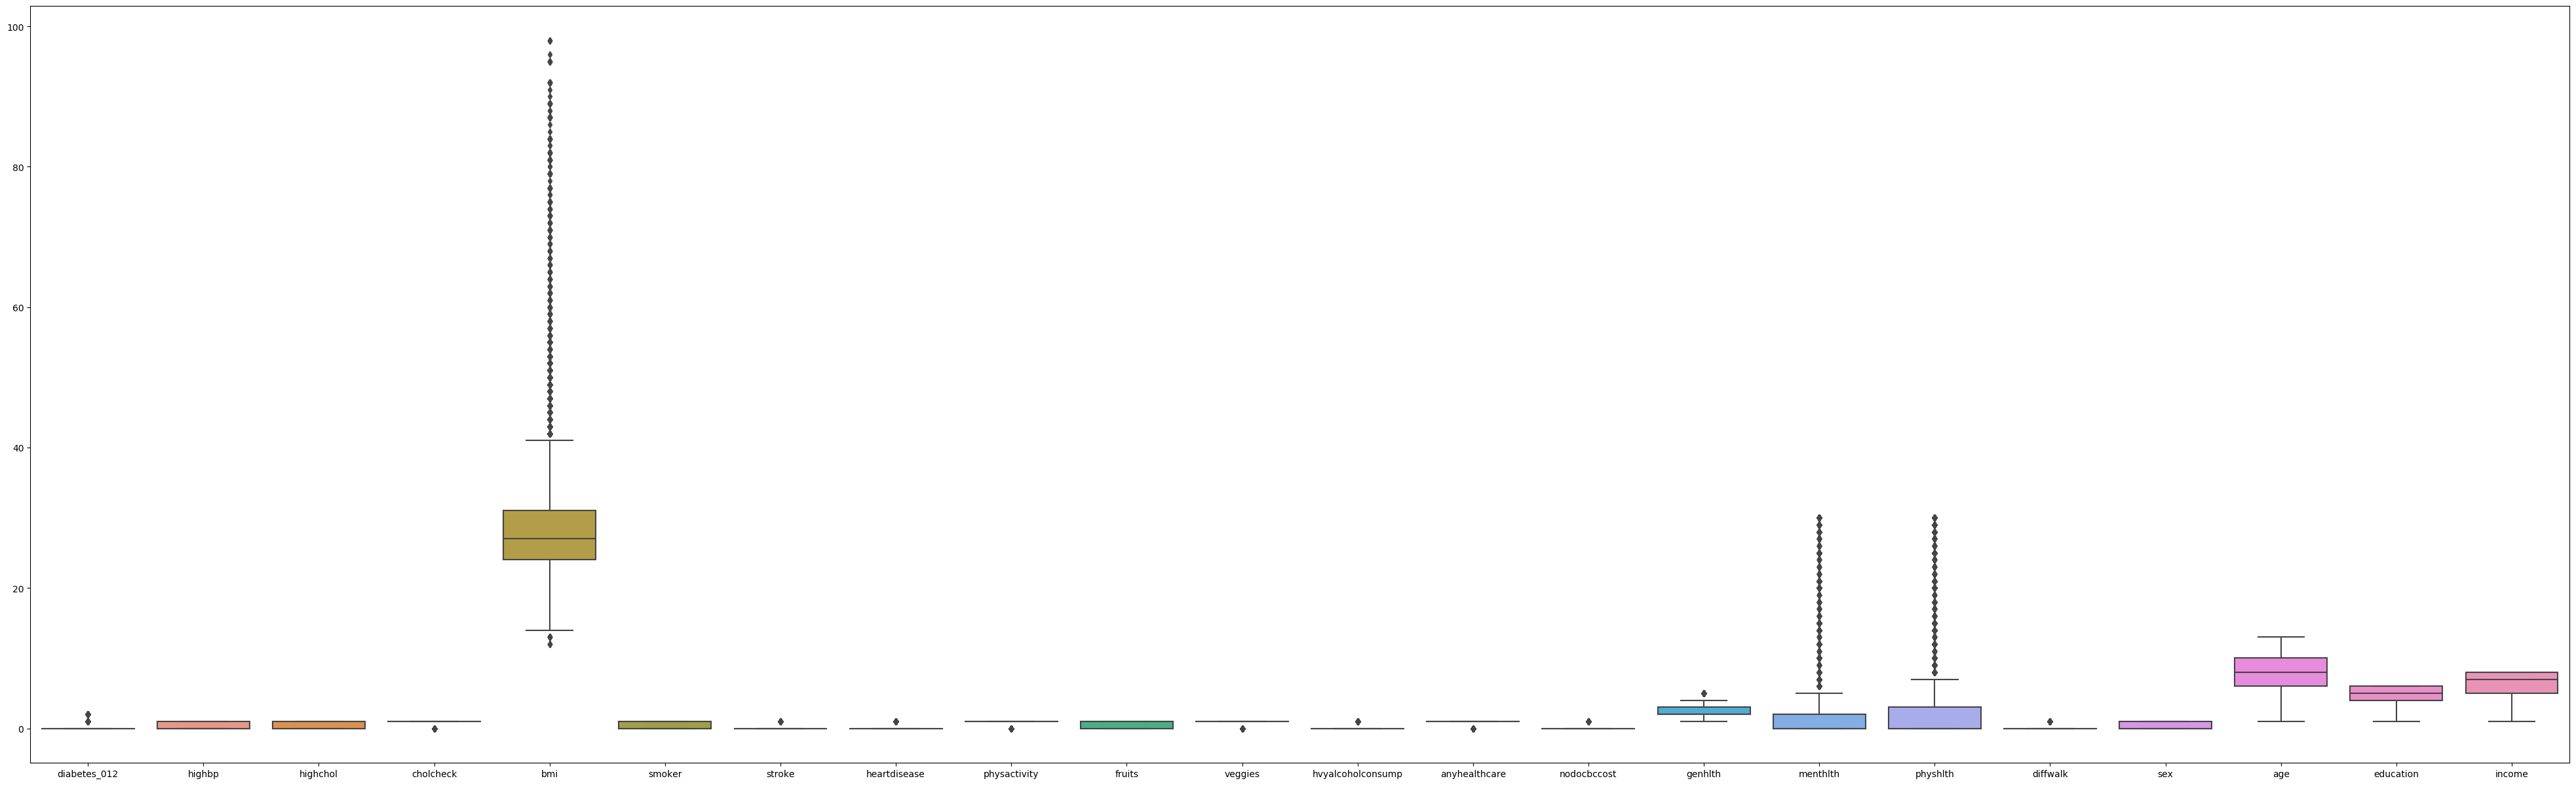

In [35]:
plt.figure(figsize = (50, 15))
sns.boxplot(data = diabetes_indicators_df, orient = 'v')
plt.savefig('boxplot.pdf')
plt.show()

### Heat map
Correlation between all variables

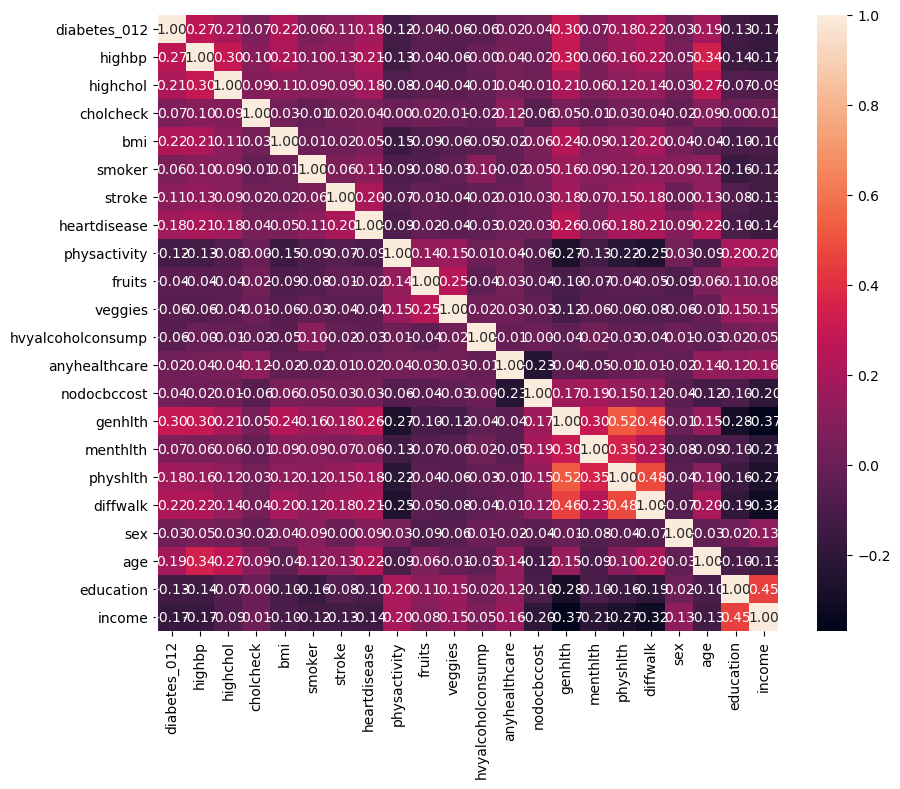

In [36]:
plt.figure(figsize = (10,8))
sns.heatmap(diabetes_indicators_df.corr(), annot = True, fmt = ".2f");
plt.savefig('heatmap.pdf')
plt.show()

***

## Data Preparation

### Cleaning

#### Remove duplicate rows

In [ ]:
# Filter to display duplicate rows
filter_duplicate = """SELECT *, COUNT(*) AS count FROM diabetes_indicators_df
                        GROUP BY diabetes_012, HighBP, HighChol, CholCheck, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, GenHlth, MentHlth, PhysHlth, DiffWalk, Sex, Age, Education, Income
                        HAVING COUNT(*) > 1"""

In [56]:
# Remove duplicate rows
remove_duplicate = """DELETE FROM diabetes_indicators_df
                        WHERE id NOT IN (
                        SELECT MIN(id) FROM diabetes_indicators_df
                        GROUP BY diabetes_012, HighBP, HighChol, CholCheck, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, GenHlth, MentHlth, PhysHlth, DiffWalk, Sex, Age, Education, Income)"""

#### Remove missing values

In [37]:
# Filter rows without NaN values
filter_null = """SELECT * FROM diabetes_indicators_df
                    WHERE diabetes_012 IS NOT NULL AND
                          highbp IS NOT NULL AND
                          highchol IS NOT NULL AND
                          cholcheck IS NOT NULL AND
                          bmi IS NOT NULL AND
                          smoker IS NOT NULL AND
                          stroke IS NOT NULL AND
                          heartdisease IS NOT NULL AND
                          physactivity IS NOT NULL AND
                          fruits IS NOT NULL AND
                          veggies IS NOT NULL AND
                          hvyalcoholconsump IS NOT NULL AND
                          anyhealthcare IS NOT NULL AND
                          nodocbccost IS NOT NULL AND
                          genhlth IS NOT NULL AND
                          menthlth IS NOT NULL AND
                          physhlth IS NOT NULL AND
                          diffwalk IS NOT NULL AND
                          sex IS NOT NULL AND
                          age IS NOT NULL AND
                          education IS NOT NULL AND
                          income IS NOT NULL"""

In [38]:
# Remove missing values
remove_missing_values = """DELETE FROM remove_duplicate
                            WHERE diabetes_012 IS NULL OR
                                  highbp IS NULL OR
                                  highchol IS NULL OR
                                  cholcheck IS NULL OR
                                  bmi IS NULL OR
                                  smoker IS NULL OR
                                  stroke IS NULL OR
                                  heartdisease IS NULL OR
                                  physactivity IS NULL OR
                                  fruits IS NULL OR
                                  veggies IS NULL OR
                                  hvyalcoholconsump IS NULL OR
                                  anyhealthcare IS NULL OR
                                  nodocbccost IS NULL OR
                                  genhlth IS NULL OR
                                  menthlth IS NULL OR
                                  physhlth IS NULL OR
                                  diffwalk IS NULL OR
                                  sex IS NULL OR
                                  age IS NULL OR
                                  education IS NULL OR
                                  income IS NULL"""

#### Remove invalid data (Outliers for predictor variables)

In [39]:
# Filter rows without outliers
filter_outliers = """SELECT * FROM diabetes_indicators_df
                     WHERE diabetes_012 IN (0, 1, 2) AND
                           HighBP IN (0, 1) AND
                           HighChol IN (0, 1) AND
                           CholCheck IN (0, 1) AND
                           Smoker IN (0, 1) AND
                           Stroke IN (0, 1) AND
                           HeartDiseaseorAttack IN (0, 1) AND
                           PhysActivity IN (0, 1) AND
                           Fruits IN (0, 1) AND
                           Veggies IN (0, 1) AND
                           HvyAlcoholConsump IN (0, 1) AND
                           AnyHealthcare IN (0, 1) AND
                           NoDocbcCost IN (0, 1) AND
                           GenHlth >= 1 AND GenHlth <= 5 AND
                           MentHlth >= 0 AND MentHlth <= 30 AND
                           PhysHlth >= 0 AND PhysHlth <= 30 AND
                           DiffWalk IN (0, 1) AND
                           Sex IN (0, 1) AND
                           Age >= 1 AND Age <= 13 AND
                           Education >= 1 AND Education <= 6 AND
                           Income >= 1 AND Income <= 8"""

In [40]:
# Remove outliers
remove_outliers = """SELECT * FROM remove_missing_values
                     WHERE diabetes_012 NOT IN (0, 1, 2) OR
                           HighBP NOT IN (0, 1) OR
                           HighChol NOT IN (0, 1) OR
                           CholCheck NOT IN (0, 1) OR
                           Smoker NOT IN (0, 1) OR
                           Stroke NOT IN (0, 1) OR
                           HeartDiseaseorAttack NOT IN (0, 1) OR
                           PhysActivity NOT IN (0, 1) OR
                           Fruits NOT IN (0, 1) OR
                           Veggies NOT IN (0, 1) OR
                           HvyAlcoholConsump NOT IN (0, 1) OR
                           AnyHealthcare NOT IN (0, 1) OR
                           NoDocbcCost NOT IN (0, 1) OR
                           GenHlth < 1 OR GenHlth > 5 OR
                           MentHlth < 0 OR MentHlth > 30 OR
                           PhysHlth < 0 OR PhysHlth > 30 OR
                           DiffWalk NOT IN (0, 1) OR
                           Sex NOT IN (0, 1) OR
                           Age < 1 OR Age > 13 OR
                           Education < 1 OR Education > 6 OR
                           Income < 1 OR Income > 8"""

### Feature Transformations

#### Transforming the Target Variable Diabetes_012

*Given the predictive task at hand, we will be transforming our target variable Diabetes_012 from multiclass to binary. To transform the target variable to binary, we will be combining the prediabetes and diabetes (i.e, 1 and 2) together into one category called diabetes. The reason for combining the two instead of just removing the prediabetes rows is because "according to an ADA expert panel, up to 70% of individuals with prediabetes will eventually develop diabetes" (Tabák et al., 2012). Given that a majority (70%) of prediabetes develops into diabetes, it makes sense to combine the two classes together.*

Reference: Tabák, A. G., Herder, C., Rathmann, W., Brunner, E. J., & Kivimäki, M. (2012). Prediabetes: a high-risk state for diabetes development. Lancet (London, England), 379(9833), 2279–2290. https://doi.org/10.1016/S0140-6736(12)60283-9

In [41]:
diabetes_indicators_df.loc[diabetes_indicators_df['diabetes_012'] > 1, 'diabetes_012'] = 1

In [42]:
diabetes_indicators_df['diabetes_012'].value_counts()

0    213703
1     39977
Name: diabetes_012, dtype: int64

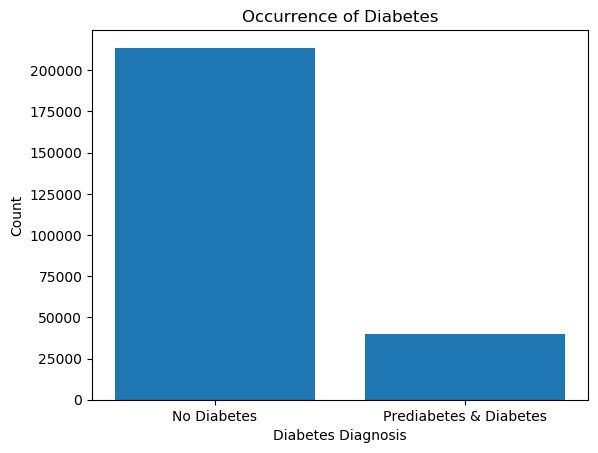

In [43]:
plt.bar(['No Diabetes', 'Prediabetes & Diabetes'], diabetes_indicators_df['diabetes_012'].value_counts())
plt.title('Occurrence of Diabetes')
plt.xlabel('Diabetes Diagnosis')
plt.ylabel('Count')
plt.show()

*Clear imbalance in the target variable seen in the bar plot above. Will be rebalanced after splitting the data.*

#### Transforming Skewed Numeric Predictor bmi

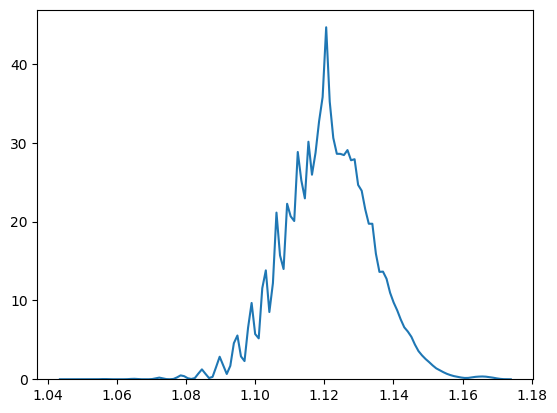

In [44]:
numeric_data = diabetes_indicators_df['bmi']
transformed_bmi, best_lambda_bmi = boxcox(numeric_data) 

sns.distplot(transformed_bmi, hist=False, kde=True) 
plt.show()

In [45]:
bmi_transformed_df = pd.DataFrame(transformed_bmi, columns = ['bmi_boxcox'])
diabetes_indicators_trans = pd.concat([diabetes_indicators_df, bmi_transformed_df], axis = 'columns')

diabetes_indicators_trans

,diabetes_012,highbp,highchol,cholcheck,bmi,smoker,stroke,heartdisease,physactivity,fruits,...,nodocbccost,genhlth,menthlth,physhlth,diffwalk,sex,age,education,income,bmi_boxcox
0,0,0,0,1,21,1,0,0,1,1,...,1,3,2,0,0,0,7,5,4,1.102731
1,0,0,0,1,24,0,0,0,1,1,...,0,1,0,0,0,0,4,6,8,1.112656
2,0,1,1,1,27,0,0,0,1,1,...,0,2,2,1,0,0,10,5,8,1.120537
3,0,1,1,1,23,0,0,0,0,0,...,0,2,0,0,0,0,10,5,7,1.109612
4,0,0,1,1,41,0,0,0,1,1,...,0,3,0,0,0,1,11,6,7,1.142989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1,1,1,45,0,0,0,0,1,...,0,3,0,5,0,1,5,6,7,1.147011
253676,1,1,1,1,18,0,0,0,0,0,...,0,4,0,0,1,0,11,2,4,1.089808
253677,0,0,0,1,28,0,0,0,1,1,...,0,1,0,0,0,0,2,5,2,1.122818
253678,0,1,0,1,23,0,0,0,0,1,...,0,3,0,0,0,1,7,5,1,1.109612


## Splitting the Data

In [46]:
x = diabetes_indicators_trans.iloc[:, 1:23]
y = diabetes_indicators_trans['diabetes_012']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(152208, 22)
(152208,)
(101472, 22)
(101472,)


## Balancing the Target Variable in the Training Set with Oversamping

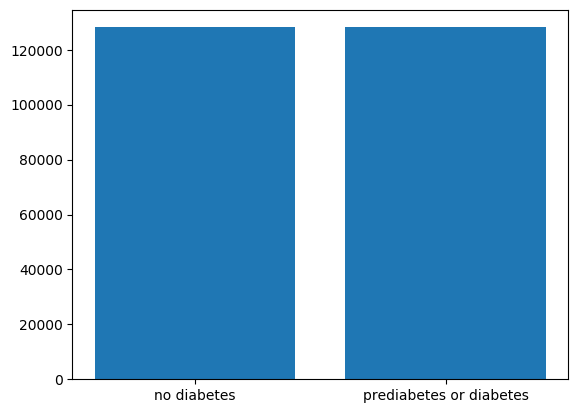

In [47]:
resamp = RandomOverSampler(random_state=42)
x_res, y_res = resamp.fit_resample(x_train, y_train)
plt.bar(['no diabetes', 'prediabetes or diabetes'], y_res.value_counts())
plt.show()

In [48]:
'''
# storing diabetes_indicators_trans df in S3 bucket
s3_client = boto3.client("s3")
BUCKET='diabetes-ads508'
KEY='raw-files/'
response = s3_client.get_object(Bucket=BUCKET, Key=KEY)

with io.StringIO() as csv_buffer:
    diabetes_indicators_trans.to_csv(csv_buffer, index=False, header=True)

    response = s3_client.put_object(
        Bucket=BUCKET, Key=KEY, Body=csv_buffer.getvalue()
    )'''

'\n# storing diabetes_indicators_trans df in S3 bucket\ns3_client = boto3.client("s3")\nBUCKET=\'diabetes-ads508\'\nKEY=\'raw-files/\'\nresponse = s3_client.get_object(Bucket=BUCKET, Key=KEY)\n\nwith io.StringIO() as csv_buffer:\n    diabetes_indicators_trans.to_csv(csv_buffer, index=False, header=True)\n\n    response = s3_client.put_object(\n        Bucket=BUCKET, Key=KEY, Body=csv_buffer.getvalue()\n    )'

In [49]:
x_res.head()

,highbp,highchol,cholcheck,bmi,smoker,stroke,heartdisease,physactivity,fruits,veggies,...,nodocbccost,genhlth,menthlth,physhlth,diffwalk,sex,age,education,income,bmi_boxcox
0,1,1,1,23,1,0,0,1,1,0,...,0,3,0,0,0,1,13,6,8,1.109612
1,0,1,1,27,0,0,0,1,1,1,...,0,3,3,14,0,0,6,5,8,1.120537
2,0,1,1,29,1,0,0,0,1,0,...,0,3,0,0,0,1,9,5,8,1.124954
3,0,0,1,30,0,0,0,1,1,1,...,0,2,0,1,0,0,7,6,8,1.126959
4,0,0,1,26,1,0,0,1,1,1,...,0,3,0,15,1,1,13,5,6,1.118096


In [50]:
y_res.value_counts()

1    128185
0    128185
Name: diabetes_012, dtype: int64

In [51]:
# Create classifier with n_estimators = 100
randForest_feat = RandomForestClassifier(n_estimators=100,
                                         random_state=111)

# Fit model
randForest_feat.fit(x_res, y_res)

RandomForestClassifier(random_state=111)

In [52]:
# Visualize feature scores
rf_scores = pd.Series(randForest_feat.feature_importances_,
                      index=x_res.columns).sort_values(ascending=False)
rf_scores

age                  0.128785
genhlth              0.097799
bmi                  0.092587
bmi_boxcox           0.092424
income               0.083882
highbp               0.069488
physhlth             0.067565
education            0.058981
menthlth             0.052030
highchol             0.037553
fruits               0.029315
smoker               0.029176
diffwalk             0.026439
sex                  0.026363
physactivity         0.023768
veggies              0.022472
heartdisease         0.016403
nodocbccost          0.012248
stroke               0.009604
hvyalcoholconsump    0.009507
anyhealthcare        0.007689
cholcheck            0.005922
dtype: float64

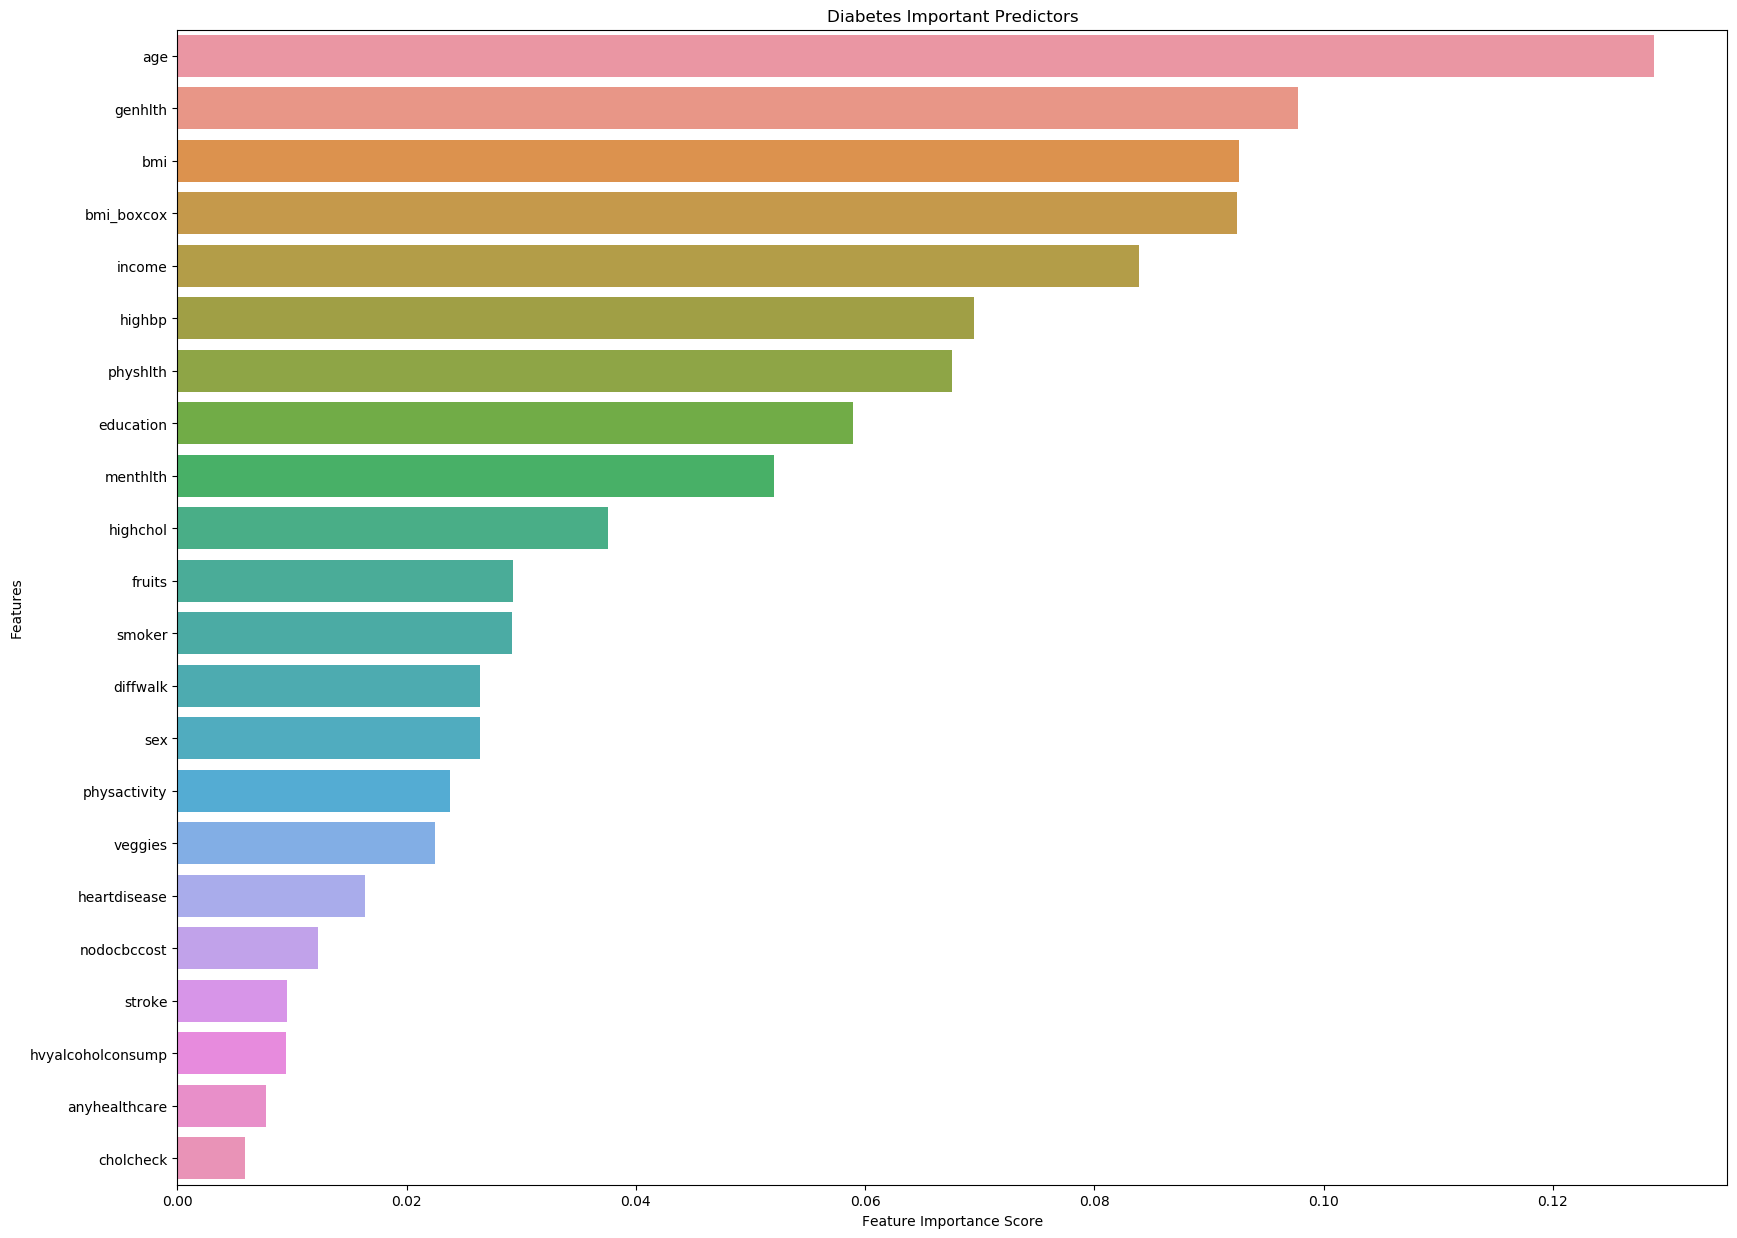

In [53]:
# Create bar plot for feature importance
f, ax = plt.subplots(figsize=(20, 15))
ax = sns.barplot(x=rf_scores, y=rf_scores.index)
ax.set_title('Diabetes Important Predictors')
ax.set_yticklabels(rf_scores.index)
ax.set_xlabel('Feature Importance Score')
ax.set_ylabel('Features')
plt.show()